<a href="https://colab.research.google.com/github/Noodle96/Topicos_Inteligencia_Artificial/blob/main/utils_topics/gradiente_descendiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy import linspace

In [39]:
# Ejemplo del gradiente descendente aplicado a la función y = x^2 + 1
# La ecuación matemática para el gradiente (derivada) es = 2*x

x_inicial = randint(30)
print('x_inicial = ', str(x_inicial))
alpha = 0.1
n_iteraciones = 15
iteraciones = []
y = []
print(type(iteraciones))
print(type(y))

x = x_inicial
print("x: ",x)

x_inicial =  19
<class 'list'>
<class 'list'>
x:  19


------------------------
iteración  1
x =  15.2 , y =  232.04
------------------------
iteración  2
x =  12.16 , y =  148.8656
------------------------
iteración  3
x =  9.728 , y =  95.633984
------------------------
iteración  4
x =  7.7824 , y =  61.56574976
------------------------
iteración  5
x =  6.22592 , y =  39.762079846400006
------------------------
iteración  6
x =  4.980736 , y =  25.807731101696003
------------------------
iteración  7
x =  3.9845888 , y =  16.87694790508544
------------------------
iteración  8
x =  3.18767104 , y =  11.161246659254683
------------------------
iteración  9
x =  2.550136832 , y =  7.503197861922997
------------------------
iteración  10
x =  2.0401094656 , y =  5.162046631630718
------------------------
iteración  11
x =  1.6320875724800001 , y =  3.6637098442436598
------------------------
iteración  12
x =  1.3056700579840002 , y =  2.7047743003159423
------------------------
iteración  13
x =  1.0445360463872002 , y =  2.0910555522022

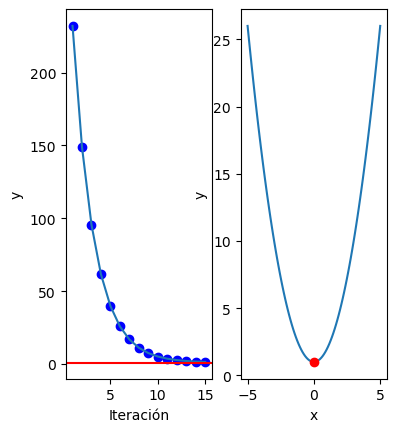

In [40]:
for i in range(n_iteraciones):
	print('------------------------')
	print('iteración ', str(i+1))

	# Calcular gradiente
	gradiente = 2*x

	# Actualizar "x" usando gradiente descendente
	x = x - alpha*gradiente

	# Almacenar iteración y valor correspondiente
	y.append(x**2 + 1)
	iteraciones.append(i+1)

	# Imprimir resultados
	print('x = ', str(x), ', y = ', str(x**2+1))

plt.subplot(1,3,1)
plt.plot(iteraciones,y)
plt.scatter(iteraciones, y, color='b', marker='o')  # Cambiar plot por scatter
plt.axhline(y=1, color='r', linestyle='-', label='Línea horizontal')  # Línea horizontal en y = 1
# plt.legend()
plt.xlabel('Iteración')
plt.ylabel('y')

X = linspace(-5,5,100)
Y = X**2 + 1
plt.subplot(1,3,2)
plt.plot(X,Y,0.0,1.0,'ro')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

___

# Descenso por Gradiente (1D) en una función polinómica

**Función objetivo:**
$$
f(x) \;=\; \frac{1}{30}\,(x+3)\,(x-2)^2\,(x-5)
$$

**Objetivos del cuaderno**
- Entender la **intuición** del descenso por gradiente (GD).
- Definir \( f(x) \) y su derivada \( f'(x) \) (analítica) y **verificar** con derivada numérica.
- Implementar GD con **tipos** y criterios de parada (gradiente, paso, iteraciones).
- Observar efectos de la **tasa de aprendizaje** ($\eta$) y del **punto inicial** ($x_0$).
- Visualizar trayectorias y convergencia.


<div style="display: flex; flex-direction: row;justify-content: center;">
  <img src="https://github.com/Noodle96/Topicos_Inteligencia_Artificial/blob/main/assets/img/functionSome.png?raw=true" width="60%">
</div>

## *1) Intuición del descenso por gradiente*

Para **minimizar** \( f(x) \) actualizamos el parámetro en la dirección **opuesta** al gradiente:
$$
\begin{align*}
x_{t+1} &= x_t \;-\; \eta\, f'(x_t), \quad \eta>0 \\
\end{align*}
$$

- Si \( f'(x_t) > 0 \) (la función **crece**), restamos algo positivo ⇒ nos movemos **a la izquierda**.
- Si \( f'(x_t) < 0 \) (la función **decrece**), restamos algo negativo ⇒ nos movemos **a la derecha**.

**Criterios de parada** típicos:
$$
\begin{align*}
|f'(x_t)| &< \varepsilon \quad (\text{pendiente pequeña}) \\
|x_{t+1}-x_t| &< \delta \quad (\text{paso pequeño}) \\
t &\ge t_{\max} \quad (\text{cota de iteraciones})
\end{align*}
$$


In [41]:
# %% [code] Imports y configuración base
from __future__ import annotations

from dataclasses import dataclass
from typing import Callable, List, Tuple

import numpy as np
import matplotlib.pyplot as plt

## *2) Definimos  f(x) y su derivada f'(x)*

Sea:
$$
    \begin{align*}
        g(x) &= (x+3)(x-2)^2(x-5) 
    \end{align*}
$$

Entonces:
$$
\begin{align*}
f(x) &= \frac{1}{30}\,g(x), \\
f'(x) &= \frac{1}{30}\,g'(x).
\end{align*}
$$

Por regla del producto:
$$
\begin{align*}
g'(x) &= (x-2)^2(x-5) + (x+3)\cdot 2(x-2)(x-5) + (x+3)(x-2)^2.
\end{align*}
$$


In [42]:
# %% [code] Definición de f(x) y f'(x) con anotaciones de tipo
def f(x: float | np.ndarray) -> float | np.ndarray:
    """
    f(x) = (1/30) * (x + 3) * (x - 2)^2 * (x - 5)
    Acepta float o np.ndarray (vectorizable) y devuelve el mismo tipo.
    """
    return (1.0 / 30.0) * (x + 3.0) * (x - 2.0) ** 2 * (x - 5.0)


def df(x: float | np.ndarray) -> float | np.ndarray:
    """
    f'(x) derivada analítica usando regla del producto:
      g'(x) = (x-2)^2(x-5) + (x+3)·2(x-2)(x-5) + (x+3)(x-2)^2
      f'(x) = (1/30)·g'(x)
    """
    termA = (x - 2.0) ** 2 * (x - 5.0)
    termB = (x + 3.0) * 2.0 * (x - 2.0) * (x - 5.0)
    termC = (x + 3.0) * (x - 2.0) ** 2
    gprime = termA + termB + termC
    return (1.0 / 30.0) * gprime

## *3) Visualización de f(x) y f'(x)*

Graficamos  f(x) para tener intuición del paisaje y f'(x) para ver dónde se anula la pendiente.


size of xs:  600


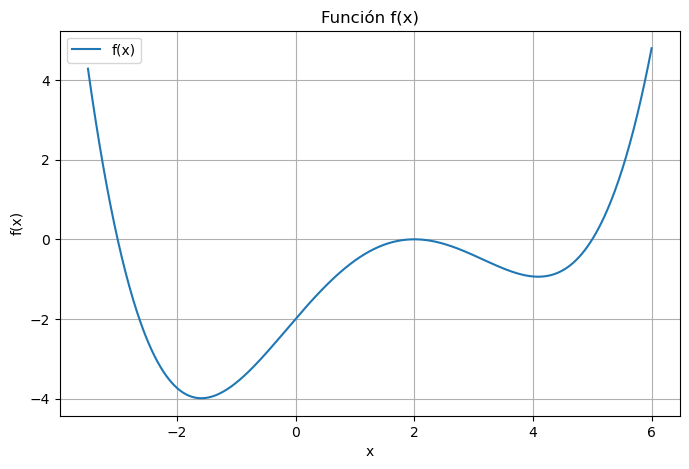

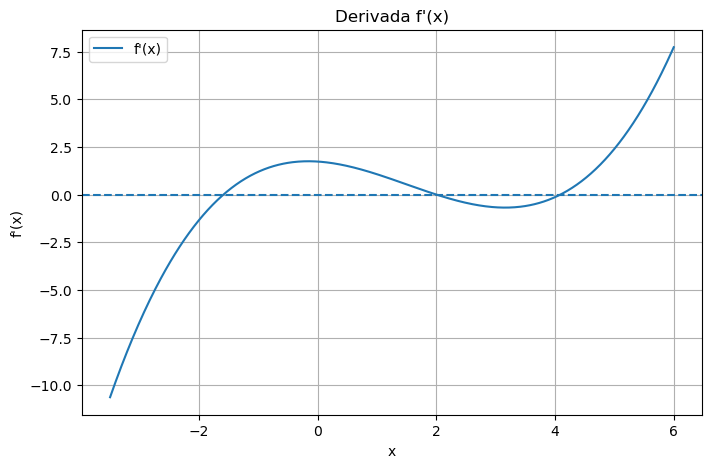

In [43]:
# %% [code] Gráficas de f(x) y f'(x)
xs: np.ndarray = np.linspace(-3.5, 6, 600)
print("size of xs: ", xs.size)

# f(x)
plt.figure(figsize=(8, 5))
plt.plot(xs, f(xs), label="f(x)")
plt.title("Función f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# f'(x)
plt.figure(figsize=(8, 5))
plt.plot(xs, df(xs), label="f'(x)")
plt.axhline(0.0, linestyle="--")
plt.title("Derivada f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()
plt.show()


De la imagen de la f'(x) vemos que:
- $f'(x) = 0$ en:
$$
    \begin{align*}
        x_1 &= -1.5 \\
        x_2 &= 2 \\
        x_3 &= 4
    \end{align*}
$$
- En $x_1 = -1.5$ existe un mínimo global y en $x_3 = 4$ existe un mínimo local.

## *4) Implementación de Descenso por Gradiente*

Regla de actualización:
$$
    x_{t+1} = x_t - \eta\, f'(x_t).
$$

Usaremos criterios de parada por pendiente, paso y límite de iteraciones. Además guardamos historial de $x_t$, $f(x_t)$ y $f'(x_t)$.


In [44]:
# %% [code] Descenso por Gradiente (1D) con tipos
@dataclass
# Con @dataclass, Python automáticamente crea el __init__, el __repr__, y el __eq__, ahorrando código repetitivo.
class GDResult:
    xs: np.ndarray       # historial de x_t
    fvals: np.ndarray    # historial de f(x_t)
    grads: np.ndarray    # historial de f'(x_t)
    eta: float           # learning rate
    x0: float            # punto inicial
    iters: int           # iteraciones realizadas
    converged: bool      # bandera de convergencia


def gradient_descent(
    x0: float,
    eta: float,
    max_iter: int = 5000,
    tol_grad: float = 1e-8,
    tol_step: float = 1e-10,
) -> GDResult:
    """
    Descenso por gradiente unidimensional para minimizar f(x).
    """
    xs: List[float] = [float(x0)]
    fvals: List[float] = [float(f(x0))]
    grads: List[float] = [float(df(x0))]

    x_t: float = float(x0)
    converged: bool = False

    for _ in range(max_iter):
        g_t: float = float(df(x_t))
        if abs(g_t) < tol_grad:
            converged = True
            break

        x_next: float = x_t - eta * g_t

        if abs(x_next - x_t) < tol_step:
            x_t = x_next
            xs.append(x_t)
            fvals.append(float(f(x_t)))
            grads.append(float(df(x_t)))
            converged = True
            break

        x_t = x_next
        xs.append(x_t)
        fvals.append(float(f(x_t)))
        grads.append(float(df(x_t)))

    return GDResult(
        xs=np.array(xs),
        fvals=np.array(fvals),
        grads=np.array(grads),
        eta=eta,
        x0=x0,
        iters=len(xs) - 1,
        converged=converged,
    )


## *5) Experimentos con tasa de aprendizaje $\eta$ y punto inicial $x_0$*

- Probaremos varios $\eta$ desde un mismo $x_0$ para ver la **estabilidad** y velocidad.
- Luego fijaremos $\eta$ y barremos varios $x_0$ para ver los **mínimos alcanzados**.


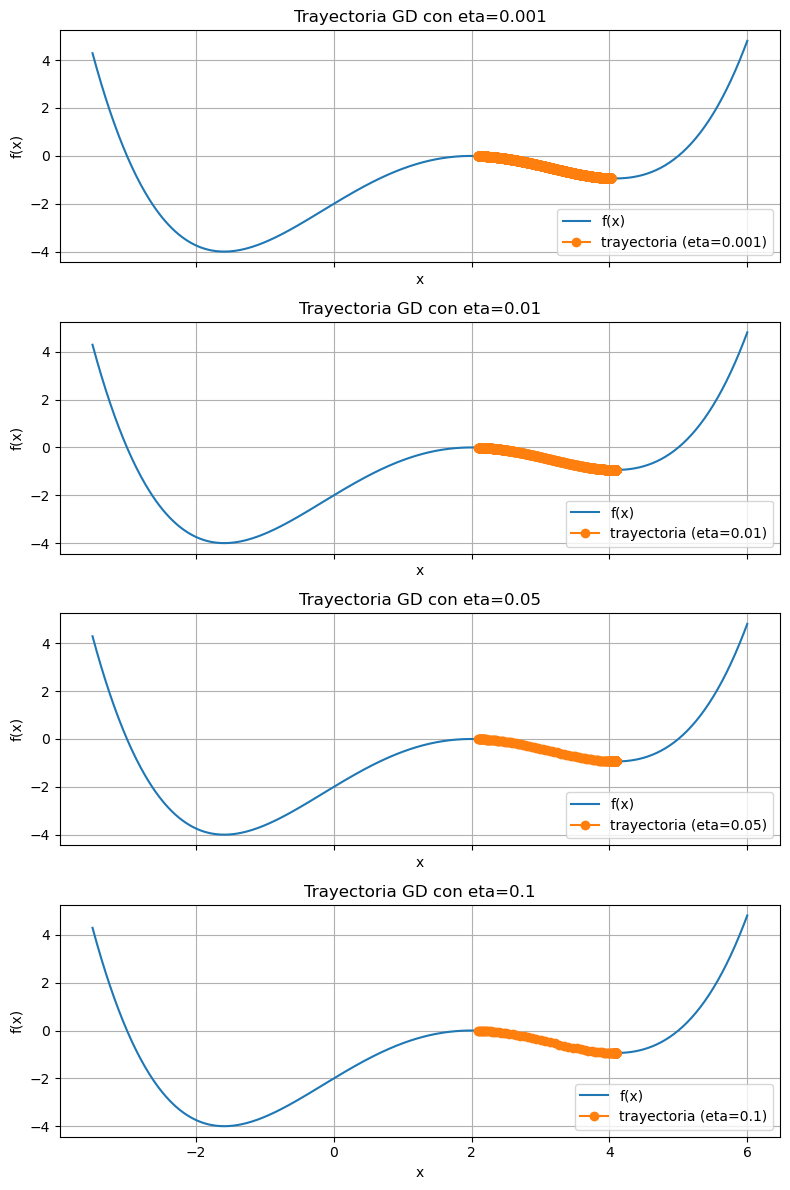

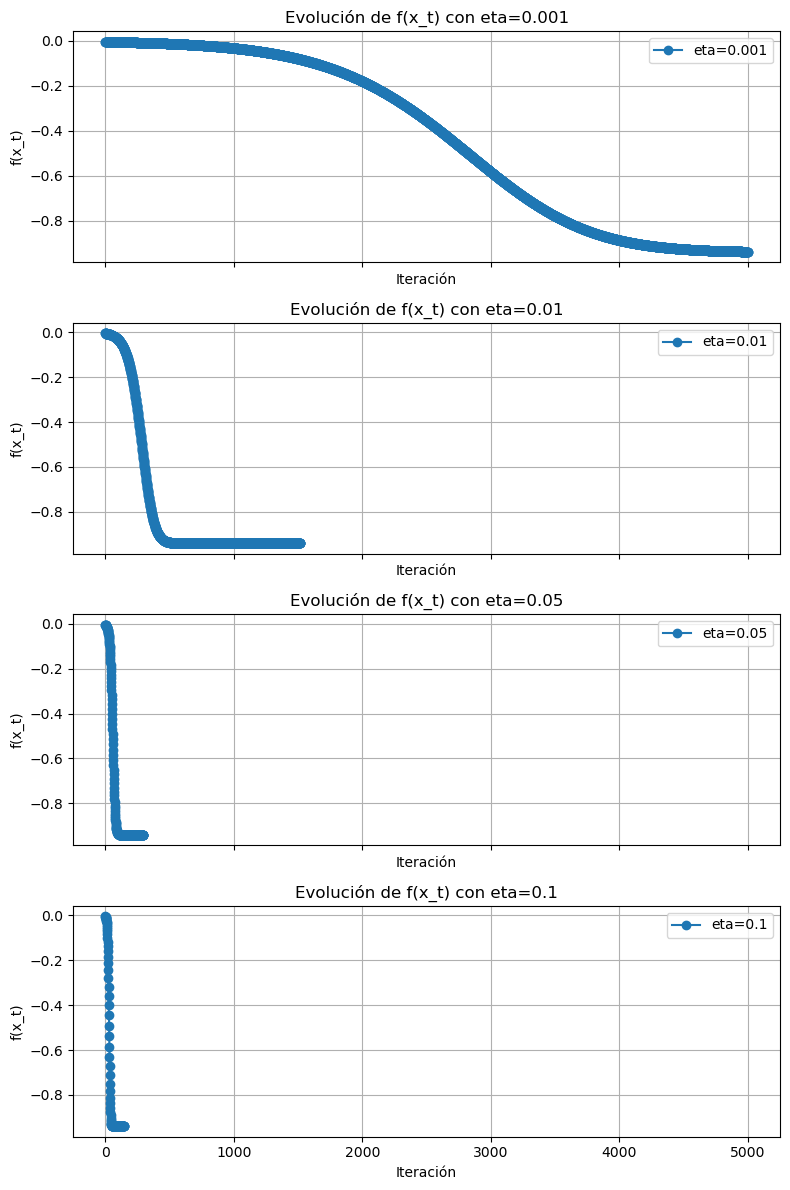

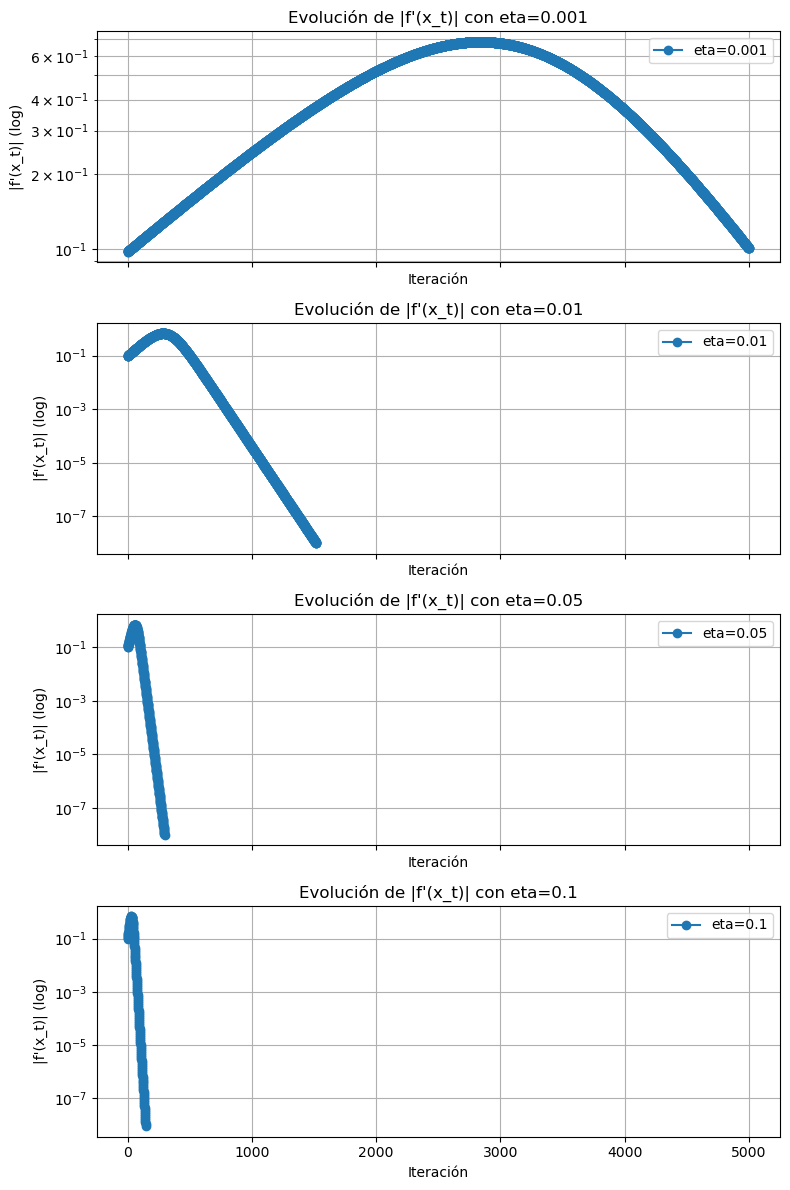

eta= 0.00100 | x0=  2.10 | iters=5000 | converged=False | x*≈4.022870 | f(x*)≈-0.936013
eta= 0.01000 | x0=  2.10 | iters=1517 | converged=True | x*≈4.089454 | f(x*)≈-0.939418
eta= 0.05000 | x0=  2.10 | iters= 297 | converged=True | x*≈4.089454 | f(x*)≈-0.939418
eta= 0.10000 | x0=  2.10 | iters= 145 | converged=True | x*≈4.089454 | f(x*)≈-0.939418


In [45]:
# %% [code] Función de apoyo para correr y graficar resultados
def run_and_plot(x0: float, etas: List[float]) -> None:
    results: List[GDResult] = [gradient_descent(x0=x0, eta=eta) for eta in etas]
    # results = []
    # for eta in etas:
    #     result = gradient_descent(x0=x0, eta=eta)
    #     results.append(result)

    #Print each result
    # for r in results:
    #     print(r)
    # return

    # Crear subplots: uno por eta
    fig, axes = plt.subplots(len(etas), 1, figsize=(8, 12), sharex=True)
    xs_dense: np.ndarray = np.linspace(-3.5, 6.0, 600)

    # Trayectorias sobre la curva f(x)
    # plt.figure(figsize=(8, 5))
    # plt.plot(xs_dense, f(xs_dense), label="f(x)")
    # for r in results:
    #     plt.plot(r.xs, r.fvals, marker="o", linestyle="-", label=f"trayectoria (eta={r.eta})")
    # plt.title(f"Trayectorias de GD desde x0={x0}")
    # plt.xlabel("x")
    # plt.ylabel("f(x)")
    # plt.grid(True)
    # plt.legend()
    # plt.show()
    for ax, r in zip(axes, results):
        # Curva base f(x)
        ax.plot(xs_dense, f(xs_dense), label="f(x)")
        # Trayectoria de GD para esa eta
        ax.plot(r.xs, r.fvals, marker="o", linestyle="-", label=f"trayectoria (eta={r.eta})")
        ax.set_title(f"Trayectoria GD con eta={r.eta}")
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()


    # # Evolución de f(x_t)
    # plt.figure(figsize=(8, 5))
    # for r in results:
    #     plt.plot(np.arange(len(r.fvals)), r.fvals, marker="o", linestyle="-", label=f"eta={r.eta}")
    # plt.title(f"Evolución de f(x_t) (x0={x0})")
    # plt.xlabel("Iteración")
    # plt.ylabel("f(x_t)")
    # plt.grid(True)
    # plt.legend()
    # plt.show()

    # # Evolución de |f'(x_t)|
    # plt.figure(figsize=(8, 5))
    # for r in results:
    #     plt.plot(np.arange(len(r.grads)), np.abs(r.grads), marker="o", linestyle="-", label=f"eta={r.eta}")
    # plt.yscale("log")
    # plt.title(f"Evolución de |f'(x_t)| (x0={x0})")
    # plt.xlabel("Iteración")
    # plt.ylabel("|f'(x_t)| (escala log)")
    # plt.grid(True, which="both")
    # plt.legend()
    # plt.show()


    # 1) Evolución de f(x_t)
    fig, axes = plt.subplots(len(etas), 1, figsize=(8, 12), sharex=True)

    for ax, r in zip(axes, results):
        ax.plot(np.arange(len(r.fvals)), r.fvals, marker="o", linestyle="-", label=f"eta={r.eta}")
        ax.set_title(f"Evolución de f(x_t) con eta={r.eta}")
        ax.set_xlabel("Iteración")
        ax.set_ylabel("f(x_t)")
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

    # 2) Evolución de |f'(x_t)|
    fig, axes = plt.subplots(len(etas), 1, figsize=(8, 12), sharex=True)

    for ax, r in zip(axes, results):
        ax.plot(np.arange(len(r.grads)), np.abs(r.grads), marker="o", linestyle="-", label=f"eta={r.eta}")
        ax.set_yscale("log")
        ax.set_title(f"Evolución de |f'(x_t)| con eta={r.eta}")
        ax.set_xlabel("Iteración")
        ax.set_ylabel("|f'(x_t)| (log)")
        ax.grid(True, which="both")
        ax.legend()

    plt.tight_layout()
    plt.show()

    # Resumen en texto
    for r in results:
        print(
            f"eta={r.eta:>8.5f} | x0={r.x0:>6.2f} | iters={r.iters:>4d} | "
            f"converged={r.converged} | x*≈{r.xs[-1]:.6f} | f(x*)≈{r.fvals[-1]:.6f}"
        )

# Ejecución de ejemplo
etas: List[float] = [0.001, 0.01, 0.05, 0.1]
run_and_plot(x0=2.1, etas=etas)


## *6) Barrido de inicializaciones*

Fijamos $\eta$ y probamos varios $x_0$ para observar hacia dónde converge el algoritmo.


x0= -5.00 | eta=0.001 | iters=5000 | conv=False | x*≈-1.589456 | f(x*)≈-3.991832
x0= -3.00 | eta=0.001 | iters=5000 | conv=False | x*≈-1.589455 | f(x*)≈-3.991832
x0= -1.00 | eta=0.001 | iters=5000 | conv=False | x*≈-1.589453 | f(x*)≈-3.991832
x0=  1.00 | eta=0.001 | iters=5000 | conv=False | x*≈-1.589418 | f(x*)≈-3.991832
x0=  3.00 | eta=0.001 | iters=5000 | conv=False | x*≈4.088327 | f(x*)≈-0.939417
x0=  5.00 | eta=0.001 | iters=5000 | conv=False | x*≈4.089658 | f(x*)≈-0.939418
x0=  7.00 | eta=0.001 | iters=5000 | conv=False | x*≈4.089793 | f(x*)≈-0.939418


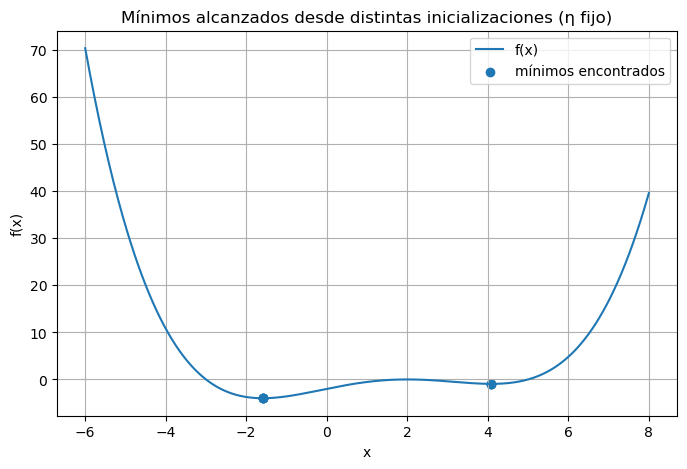

In [46]:
# %% [code] Barrido de puntos iniciales
eta_fixed: float = 0.001
x0_list: List[float] = list(np.linspace(-5.0, 7.0, 7))

results: List[GDResult] = [gradient_descent(x0=x0, eta=eta_fixed) for x0 in x0_list]

for r in results:
    print(f"x0={r.x0:>6.2f} | eta={r.eta:.3f} | iters={r.iters:>4d} | conv={r.converged} "
          f"| x*≈{r.xs[-1]:.6f} | f(x*)≈{r.fvals[-1]:.6f}")

# Visualizar mínimos alcanzados
xs_dense = np.linspace(-6.0, 8.0, 600)
plt.figure(figsize=(8, 5))
plt.plot(xs_dense, f(xs_dense), label="f(x)")
final_xs = [r.xs[-1] for r in results]
final_fs = [r.fvals[-1] for r in results]
plt.scatter(final_xs, final_fs, label="mínimos encontrados")
plt.title("Mínimos alcanzados desde distintas inicializaciones (η fijo)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


## *7) Verificación numérica de la derivada*

Comprobamos que la derivada analítica coincide con una aproximación por **diferencias finitas centradas**:
$$
    \begin{align*}
    f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}.
    \end{align*}
$$


In [47]:
# %% [code] Chequeo derivada numérica
def numeric_df(x: float, h: float = 1e-6) -> float:
    return float((f(x + h) - f(x - h)) / (2.0 * h))

test_points: List[float] = [-4.0, -1.0, 0.0, 1.5, 3.0, 4.5, 6.0]
for xp in test_points:
    da: float = float(df(xp))
    dn: float = numeric_df(xp)
    print(f"x={xp:>5.2f} | analítica={da: .8f} | numérica={dn: .8f} | error_abs={abs(da-dn):.2e}")


x=-4.00 | analítica=-15.60000000 | numérica=-15.60000000 | error_abs=2.00e-09
x=-1.00 | analítica= 1.20000000 | numérica= 1.20000000 | error_abs=2.57e-10
x= 0.00 | analítica= 1.73333333 | numérica= 1.73333333 | error_abs=8.69e-11
x= 1.50 | analítica= 0.53333333 | numérica= 0.53333333 | error_abs=4.48e-11
x= 3.00 | analítica=-0.66666667 | numérica=-0.66666667 | error_abs=9.32e-11
x= 4.50 | analítica= 0.83333333 | numérica= 0.83333333 | error_abs=1.72e-10
x= 6.00 | analítica= 7.73333333 | numérica= 7.73333333 | error_abs=1.26e-09


## *8) Diagnóstico y buenas prácticas*

- **Tasa de aprendizaje $\eta$**:
  - Muy grande ⇒ puede **divergir** u **oscilar**.
  - Muy pequeña ⇒ **convergencia lenta**.
- **Escala**: En problemas multivariados, normalizar o estandarizar puede estabilizar el GD.
- **Visualiza** $f(x_t)$ y $|f'(x_t)|$ para verificar progreso (ideal si $f$ baja monótonamente).
- **Reinicios** desde varios $x_0$ ayudan si hay **múltiples mínimos**.


## 9) Conclusiones

- Implementamos descenso por gradiente en la función:
  $$
  f(x)=\frac{1}{30}(x+3)(x-2)^2(x-5).
  $$
- Vimos cómo $\eta$ y $x_0$ afectan la **convergencia**.
- Confirmamos la derivada analítica con un **chequeo numérico**.
- Estas ideas se generalizan a redes neuronales, donde $x$ es un **vector de parámetros** y $f$ es la **pérdida**; la actualización se hace con $\nabla f$ (gradiente vectorial) usando *backpropagation*.
___


## *10) Descenso por Gradiente con Momentum (Heavy-Ball)*

La idea de **momentum** es acumular una "velocidad" que suaviza las actualizaciones y ayuda a superar valles angostos y mesetas.

Las ecuaciones (versión clásica **heavy-ball**) son:

$$
\begin{align*}
v_{t+1} &= \beta \, v_t \;+\; f'(x_t) \\
x_{t+1} &= x_t \;-\; \eta \, v_{t+1}
\end{align*}
$$

donde:
- $x_t$ es el parámetro,
- $v_t$ es la **velocidad** acumulada,
- $\eta > 0$ es la tasa de aprendizaje,
- $\beta \in [0,1)$ controla cuánta inercia mantenemos (típico: $0.8 \sim 0.95$).

> Nota: También se usa una variante con escalado de gradiente:
> $$
> v_{t+1} \;=\; \beta v_t \;+\; (1-\beta)\, f'(x_t), \quad
> x_{t+1} \;=\; x_t \;-\; \eta \, v_{t+1}
> $$
> Es equivalente a reescalar $$\eta$$ (elige **una** convención y manténla consistente).


In [52]:
# %% [code] Momentum (Heavy-Ball) para f(x) unidimensional
from __future__ import annotations

from dataclasses import dataclass
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

# Asumimos que ya definiste f(x) y df(x).
# Las vuelvo a incluir por si pegas esta celda en limpio:

def f(x: float | np.ndarray) -> float | np.ndarray:
    return (1.0 / 30.0) * (x + 3.0) * (x - 2.0) ** 2 * (x - 5.0)

def df(x: float | np.ndarray) -> float | np.ndarray:
    termA = (x - 2.0) ** 2 * (x - 5.0)
    termB = (x + 3.0) * 2.0 * (x - 2.0) * (x - 5.0)
    termC = (x + 3.0) * (x - 2.0) ** 2
    gprime = termA + termB + termC
    return (1.0 / 30.0) * gprime

@dataclass
class GDResult:
    xs: np.ndarray
    fvals: np.ndarray
    grads: np.ndarray
    eta: float
    x0: float
    iters: int
    converged: bool
    extra: dict  # para guardar 'beta', 'vs', etc.

def gradient_descent_momentum(
    x0: float,
    eta: float,
    beta: float,
    max_iter: int = 10000,
    tol_grad: float = 1e-8,
    tol_step: float = 1e-10,
) -> GDResult:
    """
    Descenso por gradiente con momentum (heavy-ball) para minimizar f(x).
      v_{t+1} = beta * v_t + df(x_t)
      x_{t+1} = x_t - eta * v_{t+1}
    """
    xs: List[float] = [float(x0)]
    fvals: List[float] = [float(f(x0))]
    grads: List[float] = [float(df(x0))]
    vs: List[float] = [0.0]  # v0 = 0

    x_t: float = float(x0)
    v_t: float = 0.0
    converged: bool = False

    for _ in range(max_iter):
        g_t: float = float(df(x_t))
        if abs(g_t) < tol_grad:
            converged = True
            break

        # Actualización heavy-ball
        v_t = beta * v_t + g_t
        x_next: float = x_t - eta * v_t

        if abs(x_next - x_t) < tol_step:
            x_t = x_next
            xs.append(x_t)
            fvals.append(float(f(x_t)))
            grads.append(float(df(x_t)))
            vs.append(v_t)
            converged = True
            break

        x_t = x_next
        xs.append(x_t)
        fvals.append(float(f(x_t)))
        grads.append(float(df(x_t)))
        vs.append(v_t)

    return GDResult(
        xs=np.array(xs),
        fvals=np.array(fvals),
        grads=np.array(grads),
        eta=eta,
        x0=x0,
        iters=len(xs) - 1,
        converged=converged,
        extra={"beta": beta, "vs": np.array(vs)},
    )


## *11) Experimentos con Momentum: barrido de $\eta$ y $\beta$*

- Fijamos un $x_0$ y comparamos distintas combinaciones de $(\eta, \beta)$.
- Visualizamos:
  1. Trayectorias $(x_t, f(x_t))$ sobre la curva de $f(x)$ (una figura por combinación o en cuadrícula).
  2. Evolución de $f(x_t)$.
  3. Evolución de $|f'(x_t)|$ (escala log).


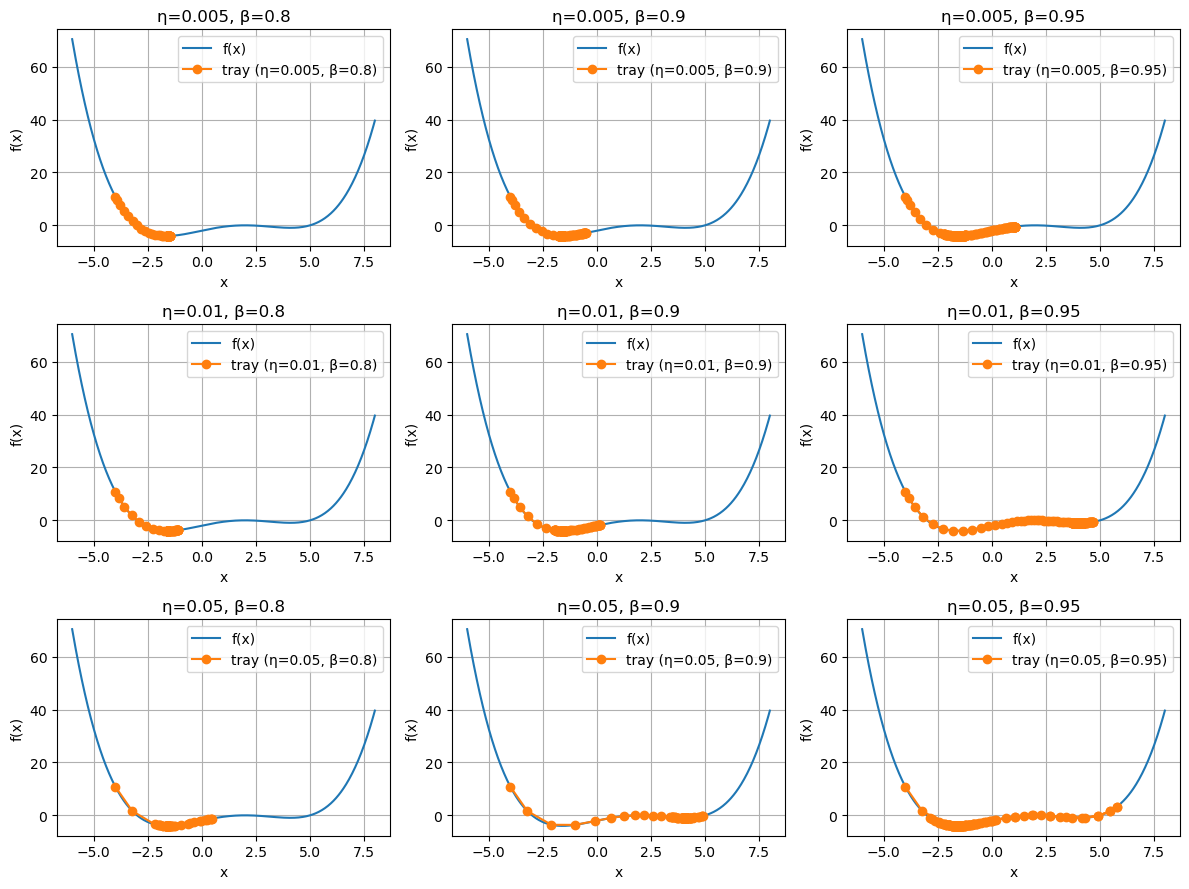

In [53]:
# %% [code] Comparación de trayectorias con subplots (cuadrícula)
x0: float = -4.0
etas: List[float] = [0.005, 0.01, 0.05]
betas: List[float] = [0.8, 0.9, 0.95]

# Ejecutamos todas las combinaciones
results_grid: List[GDResult] = []
combinations: List[Tuple[float, float]] = []
for eta in etas:
    for beta in betas:
        r = gradient_descent_momentum(x0=x0, eta=eta, beta=beta)
        results_grid.append(r)
        combinations.append((eta, beta))

# Armamos una cuadrícula de subplots: filas=len(etas), cols=len(betas)
nrows, ncols = len(etas), len(betas)
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), sharex=False, sharey=False)

xs_dense = np.linspace(-6.0, 8.0, 600)
Z = 0
for i, eta in enumerate(etas):
    for j, beta in enumerate(betas):
        ax = axes[i, j] if nrows > 1 and ncols > 1 else axes[max(i, j)]
        r = results_grid[Z]
        Z += 1

        # Curva base f(x)
        ax.plot(xs_dense, f(xs_dense), label="f(x)")
        # Trayectoria (x_t, f(x_t))
        ax.plot(r.xs, r.fvals, marker="o", linestyle="-", label=f"tray (η={eta}, β={beta})")

        ax.set_title(f"η={eta}, β={beta}")
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.show()


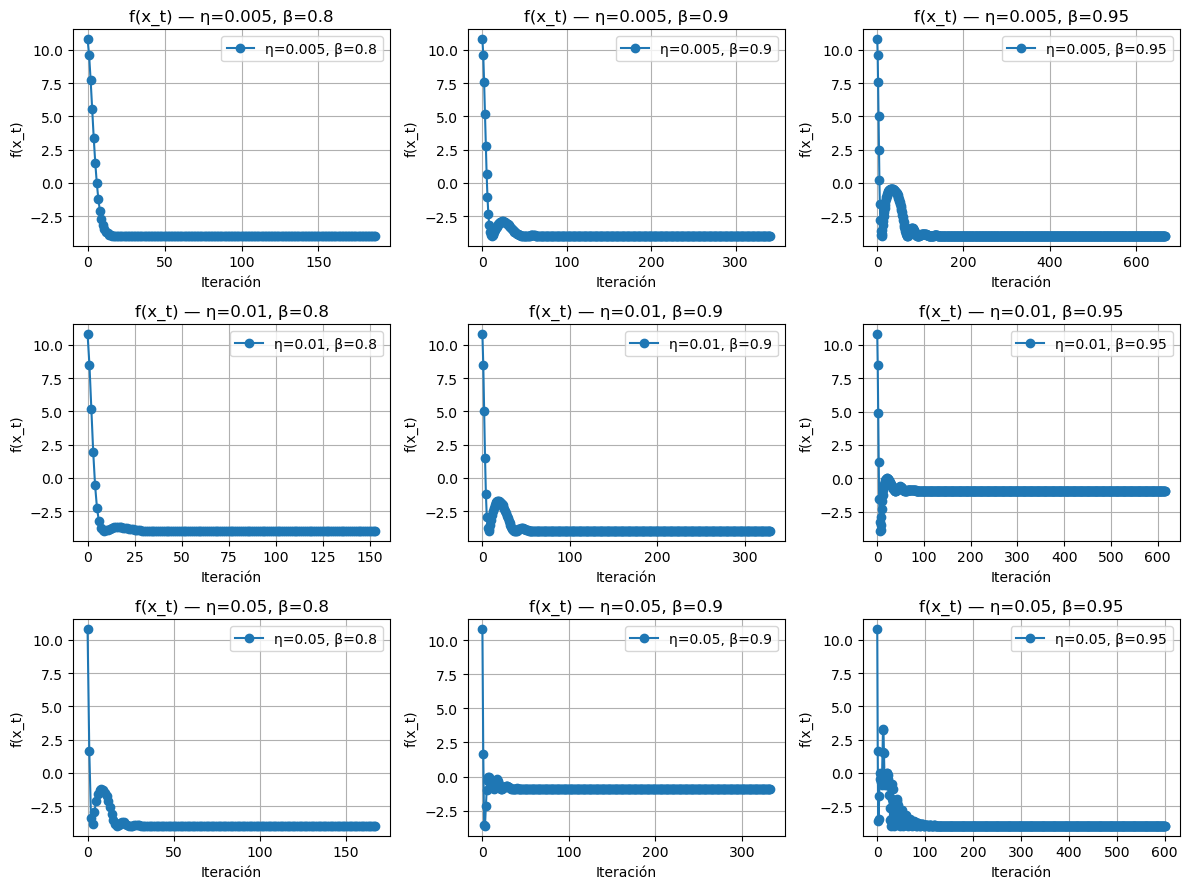

In [54]:
# %% [code] Evolución de f(x_t) por combinación (subplots)
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), sharex=False, sharey=False)

Z = 0
for i, eta in enumerate(etas):
    for j, beta in enumerate(betas):
        ax = axes[i, j] if nrows > 1 and ncols > 1 else axes[max(i, j)]
        r = results_grid[Z]
        Z += 1

        ax.plot(np.arange(len(r.fvals)), r.fvals, marker="o", linestyle="-", label=f"η={eta}, β={beta}")
        ax.set_title(f"f(x_t) — η={eta}, β={beta}")
        ax.set_xlabel("Iteración")
        ax.set_ylabel("f(x_t)")
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.show()


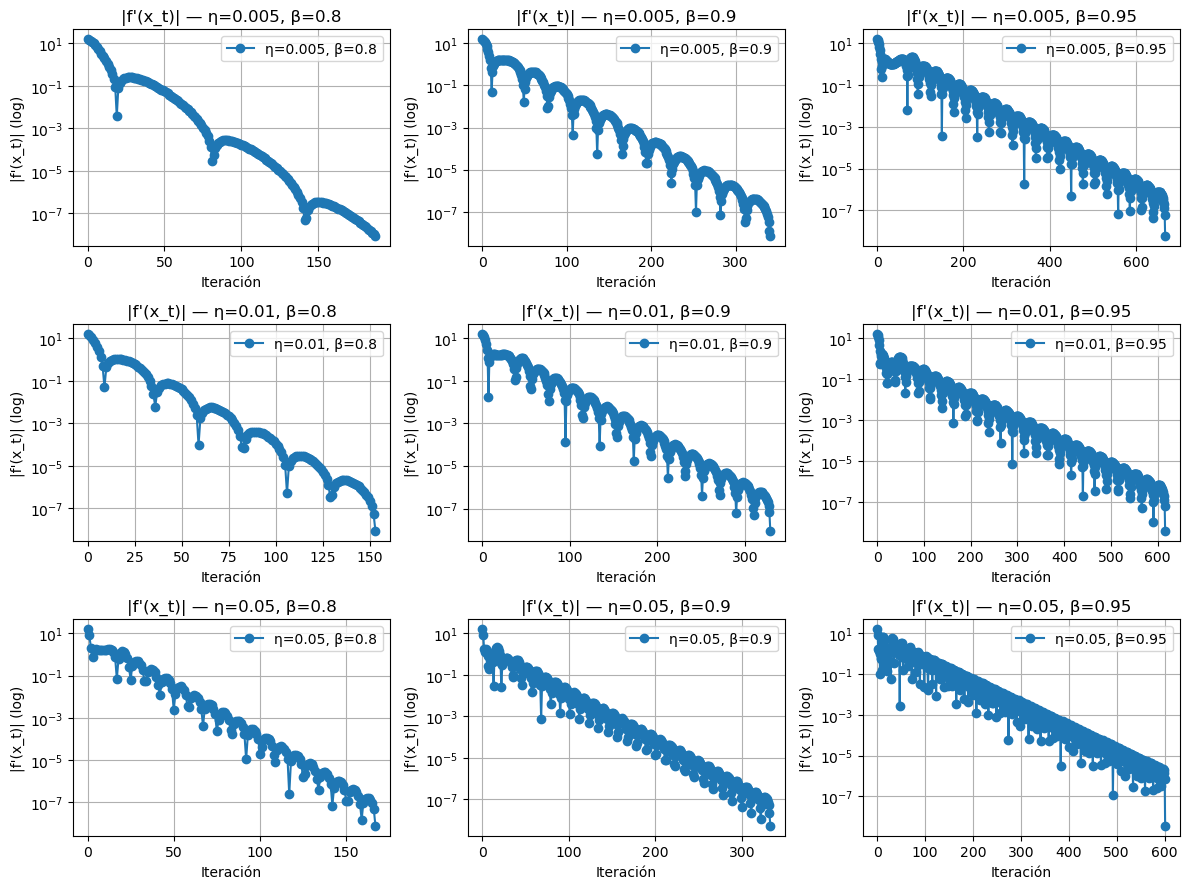

In [55]:
# %% [code] Evolución de |f'(x_t)| en escala log (subplots)
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), sharex=False, sharey=False)

Z = 0
for i, eta in enumerate(etas):
    for j, beta in enumerate(betas):
        ax = axes[i, j] if nrows > 1 and ncols > 1 else axes[max(i, j)]
        r = results_grid[Z]
        Z += 1

        ax.plot(np.arange(len(r.grads)), np.abs(r.grads), marker="o", linestyle="-", label=f"η={eta}, β={beta}")
        ax.set_yscale("log")
        ax.set_title(f"|f'(x_t)| — η={eta}, β={beta}")
        ax.set_xlabel("Iteración")
        ax.set_ylabel("|f'(x_t)| (log)")
        ax.grid(True, which="both")
        ax.legend()

plt.tight_layout()
plt.show()


## 12) Sugerencias de ajuste (tuning)

- Empieza con $\eta \in [10^{-3}, 10^{-1}]$ y $\beta \in [0.8, 0.95]$.
- Si ves **oscilación** en la trayectoria o en $f(x_t)$, reduce $\eta$ o $\beta$.
- Si la convergencia es **lenta**, aumenta ligeramente $\beta$ (más inercia) o $\eta$ con cuidado.
- En problemas de alta dimensión, **Momentum** suele mejorar mucho la estabilidad vs. GD puro.
